In [62]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete
import scipy
import matplotlib

In [63]:
df = pd.read_csv("international_matches.txt")

In [64]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,NaN,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,NaN,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,NaN,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,NaN,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,NaN,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23917,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23919,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23920,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [65]:
df.isna().sum()

date                                 0
home_team                            7
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15543
away_team_goalkeeper_score       15827
home_team_mean_defense_score     16135
home_team_mean_offense_score     15412
home_team_mean_midfield_score    15760
away_team_mean_defense_score     16358
away_team_mean_offense_score     15610
away_team_mean_midfield_score    15943
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23922 entries, 0 to 23921
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23922 non-null  object 
 1   home_team                      23915 non-null  object 
 2   away_team                      23922 non-null  object 
 3   home_team_continent            23922 non-null  object 
 4   away_team_continent            23922 non-null  object 
 5   home_team_fifa_rank            23922 non-null  int64  
 6   away_team_fifa_rank            23922 non-null  int64  
 7   home_team_total_fifa_points    23922 non-null  int64  
 8   away_team_total_fifa_points    23922 non-null  int64  
 9   home_team_score                23922 non-null  int64  
 10  away_team_score                23922 non-null  int64  
 11  tournament                     23922 non-null  object 
 12  city                           23922 non-null 

In [67]:
imputer = SimpleImputer(strategy = 'mean')
df["home_team_goalkeeper_score "] = imputer.fit_transform(df[["home_team_goalkeeper_score"]])
df["away_team_goalkeeper_score"] = imputer.fit_transform(df[["away_team_goalkeeper_score"]])
df["home_team_mean_defense_score"] = imputer.fit_transform(df[["home_team_mean_defense_score"]])
df["home_team_mean_offense_score"] = imputer.fit_transform(df[["home_team_mean_offense_score"]])
df["home_team_mean_midfield_score"] = imputer.fit_transform(df[["home_team_mean_midfield_score"]])
df["away_team_mean_defense_score"] = imputer.fit_transform(df[["away_team_mean_defense_score"]])
df["away_team_mean_offense_score"] = imputer.fit_transform(df[["away_team_mean_offense_score"]])
df["away_team_mean_midfield_score"] = imputer.fit_transform(df[["away_team_mean_midfield_score"]])
df["home_team_goalkeeper_score"] = imputer.fit_transform(df[["home_team_goalkeeper_score"]])
print("Jumlah null : ")
print(df.isna().sum())

Jumlah null : 
date                             0
home_team                        7
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
home_team_goalkeeper_score       0
dtype: int64


In [68]:
imputer = SimpleImputer(strategy = 'most_frequent')
df["home_team"] = imputer.fit_transform(df[["home_team"]])
print("Jumlah null : ")
print(df.isna().sum())

Jumlah null : 
date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
home_team_goalkeeper_score       0
dtype: int64


# Unsupervised Learnning

## K-Means Clustering

In [69]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_goalkeeper_score
0,1993-08-08,Mexico,Uruguay,South America,South America,59,22,0,0,3,...,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,74.963838
1,1993-08-08,Mexico,Mexico,South America,North America,8,14,0,0,1,...,Draw,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,74.963838
2,1993-08-08,Mexico,Venezuela,South America,South America,35,94,0,0,5,...,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,74.963838
3,1993-08-08,Mexico,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,74.963838
4,1993-08-08,Mexico,Argentina,South America,South America,67,5,0,0,1,...,Lose,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,74.963838


In [70]:
model = KMeans(n_clusters=3)

In [71]:
points = df[["home_team_score","away_team_score"]]

In [72]:
model.fit(points)
labels = model.labels_

In [73]:
print(labels)

[0 2 0 ... 2 1 0]


In [74]:
dfKmeans = pd.DataFrame({'labels': labels, 'Team': df.home_team_continent})

In [75]:
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["Team"])

In [76]:
print(ct)

Team    Africa  Asia  Europe  North America  Oceania  South America
labels                                                             
0         1054  1212    1500            591      150            469
1         1178  1336    2070            723      143            375
2         3656  2751    4024           1456      237            997


In [77]:
xs = points.iloc[:,1]
ys = points.iloc[:,0]

In [78]:
centroids = model.cluster_centers_

centroids_x = centroids[:,1]
centroids_y = centroids[:,0]

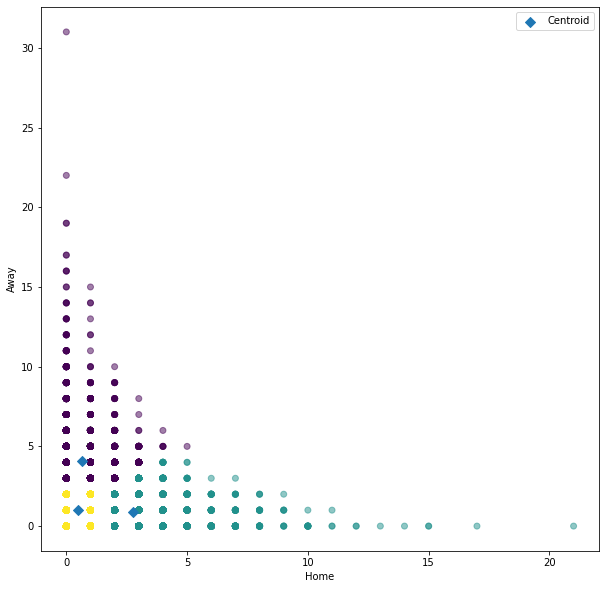

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("Home")
plt.ylabel("Away")
plt.legend()
plt.show()

## Hierarchical Clustering

In [80]:
points = df.iloc[:,[5,6]].values
points

array([[59, 22],
       [ 8, 14],
       [35, 94],
       ...,
       [28, 60],
       [23, 35],
       [29, 32]], dtype=int64)

In [81]:
linkage_hieararchical = linkage(points, method='ward')

In [ ]:
plt.figure(figsize=(25, 10), facecolor="white")
dendrogram(linkage_hieararchical)
plt.title('Dendrogram')
plt.xlabel('Home')
plt.ylabel('Away')
plt.show()